In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.special import erf
from matplotlib.patches import Ellipse
from scipy.stats import gaussian_kde

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
# Data generated using https://github.com/tcallister/get-lvk-data
sampleDict = np.load('./../../get-lvk-data/sampleDict_FAR_1_in_1_yr.pickle',allow_pickle=True)
sampleDict.keys()

dict_keys(['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170817', 'GW170818', 'GW170823', 'S190408an', 'S190412m', 'S190413ac', 'S190413i', 'S190421ar', 'S190425z', 'S190426c', 'S190503bf', 'S190512at', 'S190513bm', 'S190517h', 'S190519bj', 'S190521g', 'S190521r', 'S190527w', 'S190602aq', 'S190620e', 'S190630ag', 'S190701ah', 'S190706ai', 'S190707q', 'S190708ap', 'S190719an', 'S190720a', 'S190725t', 'S190727h', 'S190728q', 'S190731aa', 'S190803e', 'S190805bq', 'S190814bv', 'S190828j', 'S190828l', 'S190910s', 'S190915ak', 'S190917u', 'S190924h', 'S190925ad', 'S190929d', 'S190930s', 'S191103a', 'S191105e', 'S191109d', 'S191127p', 'S191129u', 'S191204r', 'S191215w', 'S191216ap', 'S191222n', 'S191230an', 'S200105ae', 'S200112r', 'S200115j', 'S200128d', 'S200129m', 'S200202ac', 'S200208q', 'S200209ab', 'S200216br', 'S200219ac', 'S200224ca', 'S200225q', 'S200302c', 'S200311bg', 'S200316bj'])

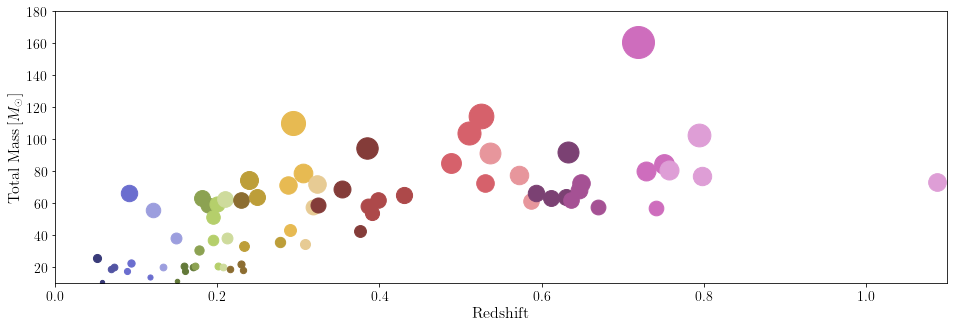

In [3]:
fig,ax = plt.subplots(figsize=(16,5))

colormap = plt.get_cmap('tab20b')
ax.set_prop_cycle('color',plt.cm.tab20b(np.linspace(0,1,len(sampleDict))))

mtots = np.array([np.mean(sampleDict[key]['m1']+sampleDict[key]['m2']) for key in sampleDict.keys()])
zs = np.array([np.mean(sampleDict[key]['z']) for key in sampleDict.keys()])

sorting = np.argsort(zs)
mtots = mtots[sorting]
zs = zs[sorting]

for i in range(mtots.size):

    ax.scatter(zs[i],mtots[i],s=[0.5*mtots[i]**1.5])
        
ax.set_xlabel(r'Redshift',fontsize=16)
ax.set_ylabel(r'Total Mass\,$[M_\odot]$',fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0,1.1)
ax.set_ylim(10,180)

plt.savefig('mass_v_redshift_pollock_plot.png',bbox_inches='tight',dpi=200)

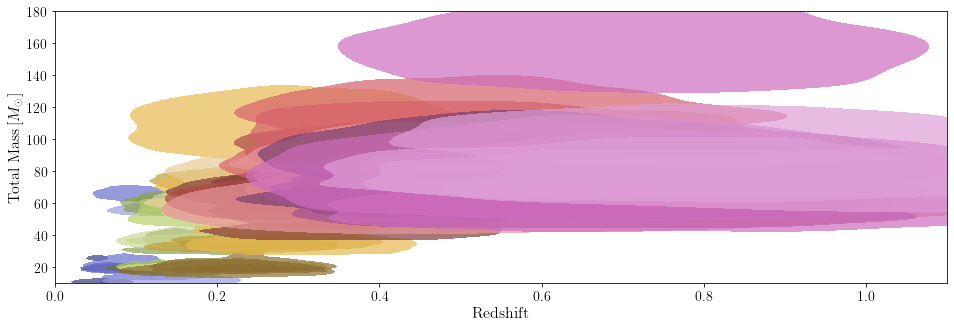

In [4]:
fig,ax = plt.subplots(figsize=(16,5))

colormap = plt.get_cmap('tab20b')
colors = plt.cm.tab20b(np.linspace(0,1,len(sampleDict)))

mtots = np.array([np.random.choice(sampleDict[key]['m1']+sampleDict[key]['m2'],size=1000,replace=True) for key in sampleDict.keys()])
zs = np.array([np.random.choice(sampleDict[key]['z'],size=1000,replace=True) for key in sampleDict.keys()])

sorting = np.argsort(np.mean(zs,axis=1))
mtots = mtots[sorting,:]
zs = zs[sorting,:]

z_grid = np.linspace(0,1.1,250)
m_grid = np.linspace(0,180,249)
Z,M = np.meshgrid(z_grid,m_grid)

for i in range(mtots.shape[0]):
    
    kde = gaussian_kde([zs[i,:],mtots[i,:]])
    p = kde([Z.reshape(-1),M.reshape(-1)])
    
    sorted_p = np.sort(p)[::-1]
    cdf = np.cumsum(sorted_p)/np.sum(sorted_p)
    c90 = np.interp(0.90,cdf,sorted_p)
    
    ax.contourf(z_grid,m_grid,p.reshape(Z.shape),levels=(c90,1000),colors=[colors[i],],alpha=0.7)
            
ax.set_xlabel(r'Redshift',fontsize=16)
ax.set_ylabel(r'Total Mass\,$[M_\odot]$',fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0,1.1)
ax.set_ylim(10,180)

plt.savefig('mass_v_redshift_pollock_plot_with_errors.png',bbox_inches='tight',dpi=200)

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_46376/4000855933.py:31: RuntimeWarning: divide by zero encountered in log
  ax.plot(xs,40.-np.log(xs-xs[0])/np.log(xs[-1]-xs[0]),dashes=(4,1,1,1),lw=3,color='black')


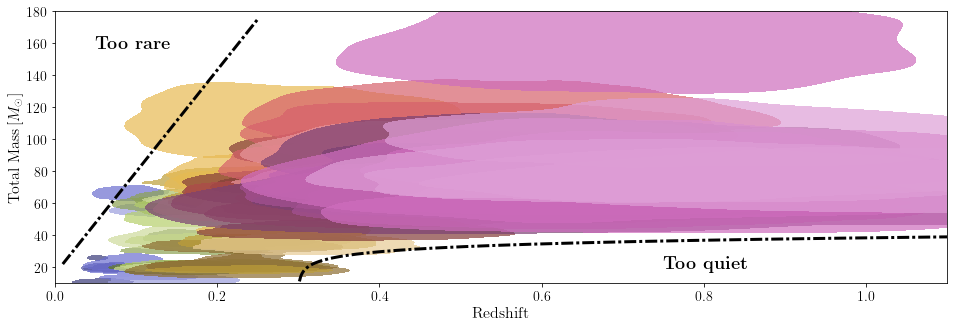

In [5]:
fig,ax = plt.subplots(figsize=(16,5))

colormap = plt.get_cmap('tab20b')
colors = plt.cm.tab20b(np.linspace(0,1,len(sampleDict)))

mtots = np.array([np.random.choice(sampleDict[key]['m1']+sampleDict[key]['m2'],size=1000,replace=True) for key in sampleDict.keys()])
zs = np.array([np.random.choice(sampleDict[key]['z'],size=1000,replace=True) for key in sampleDict.keys()])

sorting = np.argsort(np.mean(zs,axis=1))
mtots = mtots[sorting,:]
zs = zs[sorting,:]

z_grid = np.linspace(0,1.1,250)
m_grid = np.linspace(0,180,249)
Z,M = np.meshgrid(z_grid,m_grid)

for i in range(mtots.shape[0]):
    
    kde = gaussian_kde([zs[i,:],mtots[i,:]])
    p = kde([Z.reshape(-1),M.reshape(-1)])
    
    sorted_p = np.sort(p)[::-1]
    cdf = np.cumsum(sorted_p)/np.sum(sorted_p)
    c90 = np.interp(0.90,cdf,sorted_p)
    
    ax.contourf(z_grid,m_grid,p.reshape(Z.shape),levels=(c90,1000),colors=[colors[i],],alpha=0.7)
    
ax.plot([0.01,0.25],[22,175],dashes=(4,1,1,1),lw=3,color='black')

xs = np.linspace(0.3,1.1,500)
ax.plot(xs,40.-np.log(xs-xs[0])/np.log(xs[-1]-xs[0]),dashes=(4,1,1,1),lw=3,color='black')

ax.text(0.05,155,r"\bf{Too rare}",horizontalalignment='left',verticalalignment='bottom',fontsize=18)
ax.text(0.75,17,r"\bf{Too quiet}",horizontalalignment='left',verticalalignment='bottom',fontsize=18)
            
ax.set_xlabel(r'Redshift',fontsize=16)
ax.set_ylabel(r'Total Mass\,$[M_\odot]$',fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0,1.1)
ax.set_ylim(10,180)

plt.savefig('mass_v_redshift_pollock_plot_with_errors_annotated.png',bbox_inches='tight',dpi=200)